# Сборный проект

## Задача: 
Отработать принцип планирования кампании по продаже компютерных игр на будущий период (на 2017 год.) на основании данных предыдущих лет.
Выявить закономерности, определяющие успешность игры.

----
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Содержание:**
<ul>
    <li><a href='#step1'>Шаг 1 Изучение общей информации о данных</a></li>
    <li><a href='#step2'>Шаг 2 Подготовка данных</a></li>
    <li><a href='#step3'>Шаг 3 Проведение исследовательского анализа данных</a></li>
    <li><a href='#step4'>Шаг 4 Составление портрета пользователя каждого региона</a></li>
    <li><a href='#step5'>Шаг 5 Проверка гипотез</a></li>
    <li><a href='#step6'>Шаг 6 Общий вывод</a></li>
</ul>

<a id='step1'></a>

### Шаг 1 Изучение общей информации о данных

<a href='#step1'>Шаг 1</a> - <a href='#step2'>Шаг 2</a> - <a href='#step3'>Шаг 3</a> - <a href='#step4'>Шаг 4</a> - <a href='#step5'>Шаг 5</a> - <a href='#step6'>Шаг 6</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Прочитаем данные из файла

In [2]:
games = pd.read_csv('/datasets/games.csv') 

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Необходимо:
- привести наименования столбцов к нижнему регистру.
- `year_of_release` привести к целому типу.
- `user_score` привести к типу float.
- в столбцах `year_of_release`, `user_score`, `genre`, `critic_score`, `name`, `rating` обработать пропущенные значения.

In [5]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<a id='step2'></a>

### Шаг 2 Подготовка данных

<a href='#step1'>Шаг 1</a> - <a href='#step2'>Шаг 2</a> - <a href='#step3'>Шаг 3</a> - <a href='#step4'>Шаг 4</a> - <a href='#step5'>Шаг 5</a> - <a href='#step6'>Шаг 6</a>

#### Приведем наименования столбцов к нижнему регистру.

In [6]:
games.columns = games.columns.str.lower()

#### Приведем столбец `year_of_release` к целому типу.

Проверим долю записей, в которых отсутствует информации о годе выпуска (`year_of_release` == `NaN`).

In [7]:
games['year_of_release'].isna().sum()/len(games['year_of_release'])

0.01609332934489979

Доля таких записей невелика, удалим записи без года выпуска.

In [8]:
games = games.dropna(subset=['year_of_release']).reset_index(drop=True)

In [9]:
games[games['year_of_release'].isna()]['year_of_release'].sum()

0.0

Приведем столбец `year_of_release` к типу `int32`.

In [10]:
games['year_of_release'] = games['year_of_release'].astype('int32')

#### Приведем столбец `user_score` к типу `float`.

In [11]:
games['user_score'].isna().sum()

6607

In [12]:
games['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
9.6       2
1         2
0.2       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Столбец содержит помимо числовых значений значения `tbd` (вероятно, 'to be defined' - значение должно быть определено) и `NaN`. Похоже, эти значения говорят о том, что у игры отсутствует пользовательский рейтинг. 

Для игр с `tbd` и `NaN` мы не можем указать нулевое значение рейтинга, т.к. в таблице есть игра 'My Little Pony: Pinkie Pie's Party', у которой действительно стоит нулевой рейтинг и он означает не отсутствие рейтинга, а то, что пользователи крайне низко оценили игру. 

In [13]:
games[games['user_score'] == '0']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2798,My Little Pony: Pinkie Pie's Party,DS,2008,Adventure,0.66,0.0,0.0,0.06,NaN,0,E


Для удобства работы с числовыми значениями рейтинга заменим значения `tbd` и `NaN` на `-1`. Для нас это будет маркетом отсутсвия значения рейтинга.

In [14]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
name               16444 non-null object
platform           16446 non-null object
year_of_release    16446 non-null int32
genre              16444 non-null object
na_sales           16446 non-null float64
eu_sales           16446 non-null float64
jp_sales           16446 non-null float64
other_sales        16446 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(5), int32(1), object(5)
memory usage: 1.3+ MB


In [15]:
games[games['user_score'].isna()]
games[games['user_score'] == 'tbd'].head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
300,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+


In [16]:
games.loc[games.loc[:, 'user_score'] == 'tbd', 'user_score'] = np.nan

In [17]:
games['user_score'] = games['user_score'].fillna(-1)

Приведем к типу `float32`.

In [18]:
games['user_score'] = games['user_score'].astype('float32')

- в столбцах `genre`, `name`, `critic_score`, `rating` обработаем пропущенные значения.

#### Удалим строки с отсутствующим значением `genre` и `name`.

In [19]:
games[(games['genre'].isna()) | (games['name'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
652,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,-1.0,NaN
14022,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,-1.0,NaN


In [20]:
games = games.dropna(subset=['name']).reset_index(drop=True)

#### Добавим столбец с данными о суммарных продажах.

In [21]:
games.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E


In [22]:
#games['total_sales'] = games[[x for x in games.columns if 'sales' in x]].agg(func=sum, axis=1)

In [23]:
games['total_sales'] = games.filter(like='sales', axis=1).agg(func=sum, axis=1)

In [24]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,-1.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,-1.0,NaN,31.38


#### Заполним пропуски в столбце `critic_score` значением `-1` - это будет маркером отсутствующего значения.

In [25]:
games['critic_score'] = games['critic_score'].fillna(-1)

In [26]:
games['critic_score'].isna().sum()

0

In [27]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int32
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null float64
user_score         16444 non-null float32
rating             9768 non-null object
total_sales        16444 non-null float64
dtypes: float32(1), float64(6), int32(1), object(4)
memory usage: 1.4+ MB


<a id='step3'></a>

### Шаг 3 Проведение исследовательского анализа данных

<a href='#step1'>Шаг 1</a> - <a href='#step2'>Шаг 2</a> - <a href='#step3'>Шаг 3</a> - <a href='#step4'>Шаг 4</a> - <a href='#step5'>Шаг 5</a> - <a href='#step6'>Шаг 6</a>

#### Объем продаж по годам.

In [28]:
#sales_by_year_of_release = games[[x for x in games.columns if 'sales' in x] + ['platform', 'year_of_release']]

In [29]:
# Их исходной таблицы выберем данные о платформах, годе выпуска и продажах
sales_by_year_of_release = games[['platform', 'year_of_release']].merge(games.filter(like='sales', 
                                                                                     axis=1), 
                                                                        left_index=True, 
                                                                        right_index=True)

In [30]:
# Сгруппируем по году выпуска
sales_by_year_of_release = sales_by_year_of_release.groupby(by='year_of_release').sum()

In [31]:
sales_by_year_of_release.tail()

,na_sales,eu_sales,jp_sales,other_sales,total_sales
year_of_release,,,,,
2012,153.26,114.59,51.80,36.19,355.84
2013,153.65,121.55,47.69,38.35,361.24
2014,132.27,122.74,39.69,36.83,331.53
2015,106.86,96.72,34.09,30.31,267.98
2016,44.93,51.22,19.31,14.48,129.94


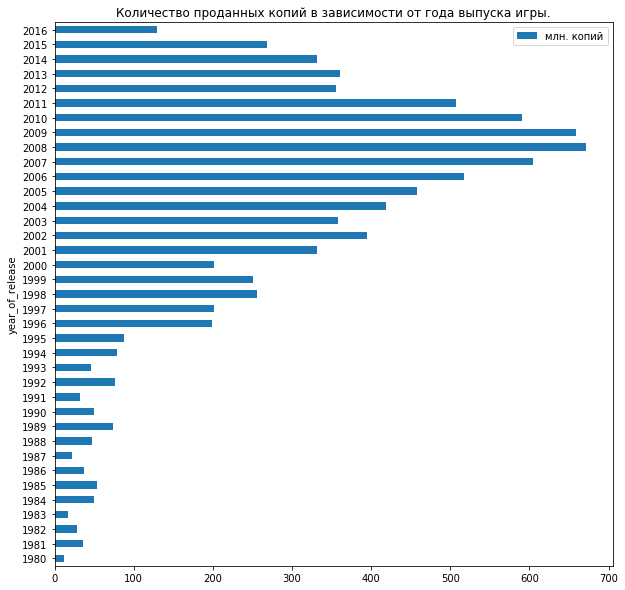

In [32]:
# Построим графикк зависимости количества продаж от года выпуска
sales_by_year_of_release.plot(y='total_sales', kind='barh', figsize=(10, 10), 
                              title='Количество проданных копий в зависимости от года выпуска игры.', 
                              label='млн. копий')

**Вывод**

На графике видно, что для игр, выпущенных до 1996 года, количество продаж составило менее 100 млн. копий для каждого года. Пик продаж пришелся на 2007-2011 гг. 
Начиная с 2008 суммарный объем продаж некулонно снижался.

----
#### Диаграмма продаж по платформам по годам.

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

- Определим платформы, по которым имеются продажи на конец 2016 г.

In [33]:
top_platforms = games.groupby(by=['year_of_release', 'platform']
                             )['total_sales'].sum().loc[2016].sort_values(ascending=False).reset_index()
top_platforms

,platform,total_sales
0,PS4,69.25
1,XOne,26.15
2,3DS,15.14
3,PC,5.25
4,WiiU,4.60
5,PSV,4.25
6,PS3,3.60
7,X360,1.52
8,Wii,0.18


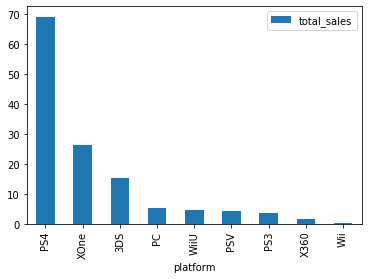

In [34]:
# Построим график зависиомости количества продаж от платформы.
top_platforms.plot(kind='bar', x='platform')

In [35]:
top_platrorms = top_platforms['platform']

- Найдем для каждой платформы год первого выпуска игры. Определим год выпуска самой раннее платфомы и проследим, начиная с этого года, как менялись продажи по всем ныне живущим платформам.

In [36]:
platforms_list = top_platrorms.unique()
first_release_year = games.query('platform in @platforms_list').groupby(by=['platform'])['year_of_release'].min().min()
first_release_year

1985

In [37]:
top_games = games.query('platform in @platforms_list and year_of_release >= @first_release_year')

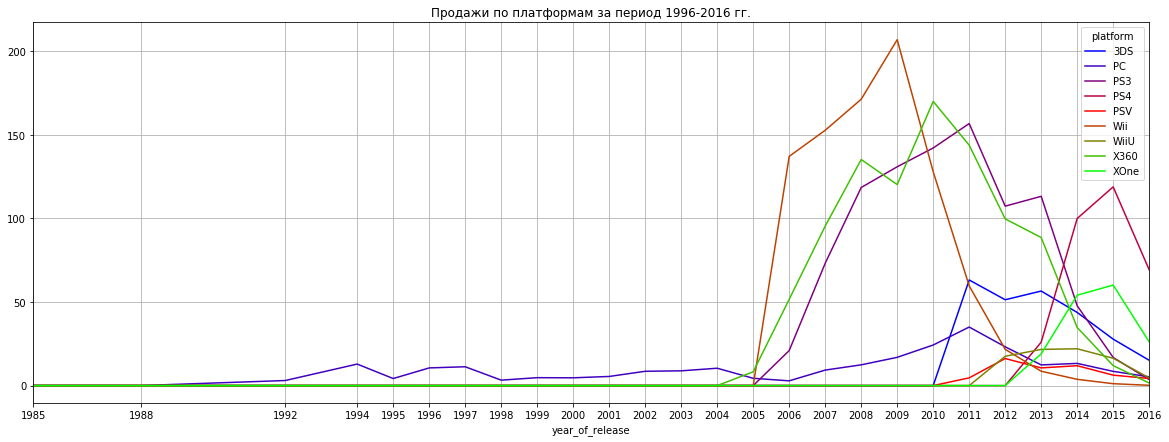

In [38]:
# построим сводную таблицу строки - год выпуска, колонки - платформа, значение - общие продажи.
# заполним пропущенные значения "0"
# выведем на график 
top_games.pivot_table(index='year_of_release', 
                                  columns='platform', 
                                  values='total_sales', 
                                  aggfunc='sum').fillna(0).plot(kind='line', 
                                                                figsize=(20, 7), 
                                                                colormap='brg', 
                                                                grid=True, 
                                                                xticks=top_games['year_of_release'].unique(), 
                                                                title='Продажи по платформам за период 1996-2016 гг.')

**Вывод**

На графике видно, что пик продаж по большинству платформ пришелся на 2007-2011 гг. При этом платформы Wii, X360, PS3, которые в этот период имели максимальные продажи, на текущий момент практически перестали существовать. 

В 2014 г. PS3 сменились на PS4 и занимают 1 место, X360 сменились на XOne и занимают 2 место. В 2011 г. появилась Nintendo 3 DS, которая занимает 3 место по продажам. Wii сменилась на WiiU, но уже не является лидером. Продажи игр для PC стабильные, но низкие по сравнению с приставками.

#### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

----
В качестве рассматриваемого периода выберем период с 2014 года, когда почти 8-летнего перерыва произошла смена поколения приставок.
Проследим развитие топовых платформ за актуальный период начиная с 2014 год.

In [39]:
actual_games = games.query('year_of_release >= 2014')

#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

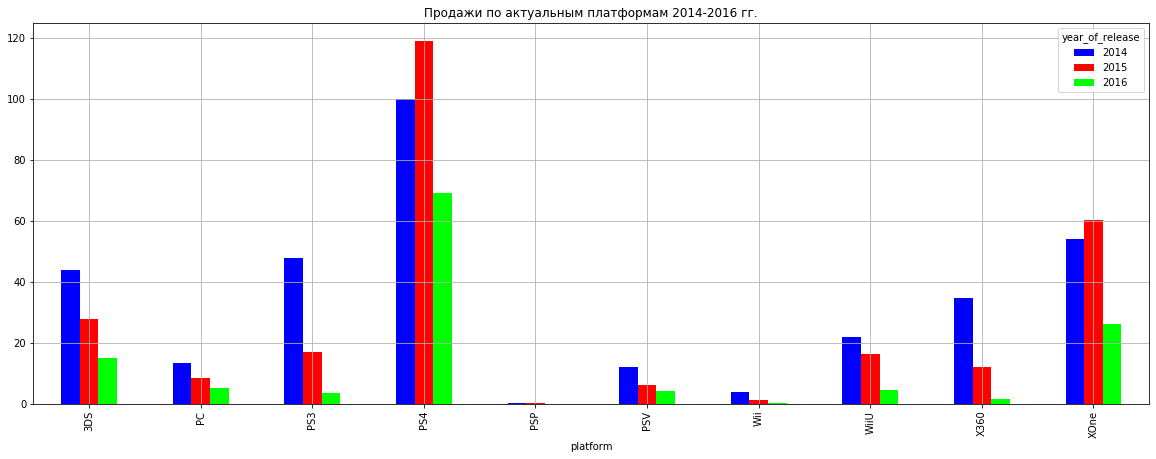

In [40]:
# построим сводную таблицу строки - платформы, колонки - год выпуска, значение - общие продажи.
# заполним пропущенные значения "0"
# выведем на график 
actual_games.pivot_table(index='platform', 
                                  columns='year_of_release', 
                                  values='total_sales', 
                                  aggfunc='sum').fillna(0).plot(kind='bar', 
                                                                figsize=(20, 7), 
                                                                colormap='brg', 
                                                                grid=True, 
                                                                xticks=actual_games['year_of_release'].unique(), 
                                                                title='Продажи по актуальным платформам 2014-2016 гг.')

На графике видно, что в целом наблюдается спад продаж по платформам. На рынке есть 3 лидера: PS4, XOne, 3DS.

In [41]:
actual_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,NaN,7.98


#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [42]:
sales = actual_games.pivot_table(index='year_of_release', 
                                  columns='platform', 
                                  values='total_sales', 
                                  aggfunc='sum').fillna(0)

In [43]:
sales.describe()

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,3.000000,3.000000,3.000000,3.000000,3.00,3.000000,3.000000,3.000000,3.000000,3.000000
mean,28.893333,9.016667,22.726667,96.050000,0.12,7.466667,1.690000,14.326667,16.073333,46.786667
std,14.342445,4.037974,22.664795,25.059579,0.12,3.967472,1.847458,8.889411,16.987694,18.127748
min,15.140000,5.250000,3.600000,69.250000,0.00,4.250000,0.180000,4.600000,1.520000,26.150000
25%,21.460000,6.885000,10.210000,84.625000,0.06,5.250000,0.660000,10.475000,6.740000,40.110000
50%,27.780000,8.520000,16.820000,100.000000,0.12,6.250000,1.140000,16.350000,11.960000,54.070000
75%,35.770000,10.900000,32.290000,109.450000,0.18,9.075000,2.445000,19.190000,23.350000,57.105000
max,43.760000,13.280000,47.760000,118.900000,0.24,11.900000,3.750000,22.030000,34.740000,60.140000


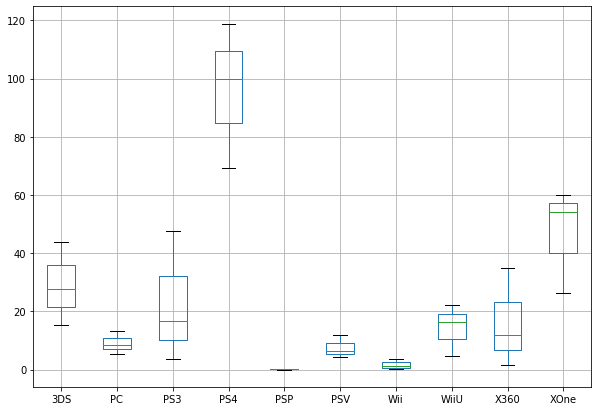

In [44]:
sales.boxplot(figsize=(10, 7))

Топ-3 платформ по медианному значению общего количества проданных копий: "PS4", "XOne", "3DS".

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(0, 1.7)

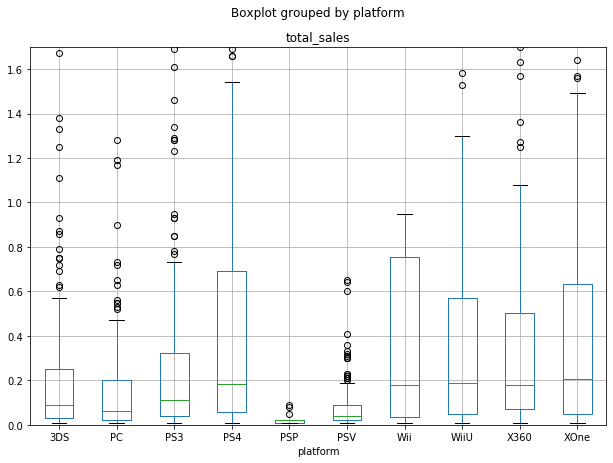

In [69]:
actual_games.boxplot(column='total_sales', by='platform', figsize=(10, 7))


In [46]:
# сгруппируем продажи по платформам, найдем максимальные продажи по каждой платформе
# выведем наименование игры, давшей максимальные продажи для каждой платформы
actual_games.groupby('platform')['total_sales'].max().reset_index().merge(right=actual_games, 
                                                                          how='left', 
                                                                          on=['platform', 'total_sales']
                                                                         ).loc[:, ['platform', 'name', 'total_sales']].sort_values(by='total_sales', 
                                                                                                                                   ascending=False).reset_index(drop=True)


,platform,name,total_sales
0,PS4,Call of Duty: Black Ops 3,14.63
1,3DS,Pokemon Omega Ruby/Pokemon Alpha Sapphire,11.68
2,XOne,Call of Duty: Black Ops 3,7.39
3,WiiU,Mario Kart 8,7.09
4,PS3,Minecraft,5.27
5,X360,Call of Duty: Advanced Warfare,4.28
6,PC,The Sims 4,3.05
7,Wii,Just Dance 2015,2.01
8,PSV,Minecraft,1.96
9,PSP,Pro Yaky? Spirits 2014,0.09


На графике видно, что на всех платформах значительная доля игр имеют низкие продажи. При этом для каждой платформы есть выбросы - игры, которые более чем на 1,5 квартиля превысили медианное значение продаж по платформе. Мы узнали какие игры лидировали по продажам по каждой платформе.

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Проверим корреляцию между отзывами экспертов и пользователей и количеством проданных копий.
Рассмотрим на примере PS есть ли связь между отзывами и продажами.

In [47]:
PS4_games = top_games[top_games['platform'] == 'PS4']

In [48]:
PS4_games[['critic_score', 'user_score', 'total_sales']].head()

,critic_score,user_score,total_sales
31,-1.0,-1.0,14.63
42,97.0,8.3,12.62
77,82.0,4.3,8.58
87,-1.0,-1.0,7.98
92,83.0,5.7,7.66


Построим диаграмму рассеяния

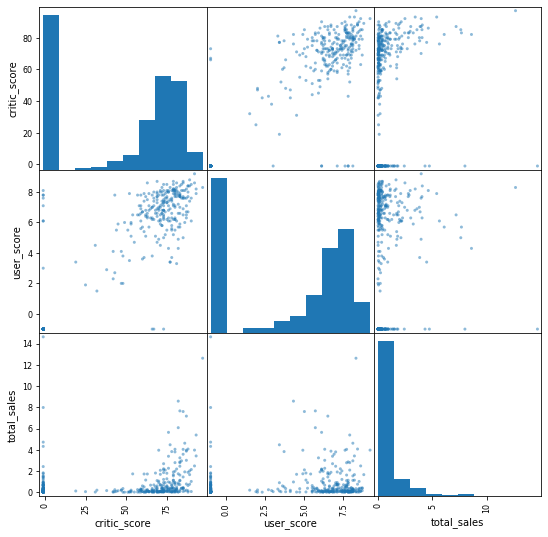

In [49]:
pd.plotting.scatter_matrix(PS4_games[['critic_score', 'user_score', 'total_sales']], figsize=(9, 9));

Посмотрим на корреляцию между отзывами критиков и пользователей на разных платформам.

In [50]:
platrorm_games = top_games[(top_games['critic_score'] != -1) & 
                           (top_games['user_score'] != -1)].loc[:, ['platform', 'total_sales', 'critic_score', 'user_score']]

In [51]:
# Функция возвращает DataFrame, содержащий коэффициенты корреляции между:
# количеством продаж и оценками критиков - total_sale_corr_critic_score;
# количеством продаж и оценками пользователей - total_sales_corr_user_score;
# оценками критиков и оценками пользователе - critic_score_corr_user_score.
def corr_table():
    data = []
    for platform in top_platforms['platform']:
        platrorm_games = top_games[(top_games['platform'] == platform)]
        data.append([platform, 
                       round(platrorm_games['total_sales'].corr(platrorm_games['critic_score']), ndigits=3),
                       round(platrorm_games['total_sales'].corr(platrorm_games['user_score']), ndigits=3), 
                       round(platrorm_games['critic_score'].corr(platrorm_games['user_score']), ndigits=3)])
    columns=['platrorm', 'total_sale_corr_critic_score', 'total_sales_corr_user_score', 'critic_score_corr_user_score']
    return pd.DataFrame(data=data, columns=columns)

In [52]:
data = corr_table()
data

,platrorm,total_sale_corr_critic_score,total_sales_corr_user_score,critic_score_corr_user_score
0,PS4,0.227,0.116,0.907
1,XOne,0.274,0.122,0.781
2,3DS,0.166,0.146,0.908
3,PC,0.079,0.008,0.747
4,WiiU,0.297,0.259,0.858
5,PSV,0.403,0.379,0.881
6,PS3,0.354,0.273,0.825
7,X360,0.310,0.206,0.789
8,Wii,0.188,0.182,0.796


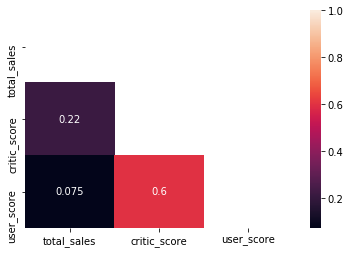

In [53]:
matrix = np.triu(platrorm_games.corr())
sns.heatmap(platrorm_games.corr(), annot=True, mask=matrix)

Из таблицы видно, что связь между отзывами критиков и количеством проданных копий для всех платформ прямая, но не слишком выраженная. 

Корреляция продаж с отзывами пользователей невысокая, а для 'PS4' и 'PC' даже отрицательная. 

Есть прямая корреляция между отзывами критиков и отзывами пользователей.

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Выберем жанры за весь период и отсортируем их по количеству проданых копий.

In [54]:
top_genre = games.groupby(by='genre')['total_sales'].sum().sort_values(ascending=False)
top_genre

genre
Action          1716.52
Sports          1309.67
Shooter         1041.36
Role-Playing     931.08
Platform         825.55
Misc             790.29
Racing           723.49
Fighting         442.66
Simulation       387.96
Puzzle           239.89
Adventure        233.33
Strategy         172.57
Name: total_sales, dtype: float64

In [55]:
#top_genre = actual_games.groupby(by='genre')['total_sales'].sum().sort_values(ascending=False)

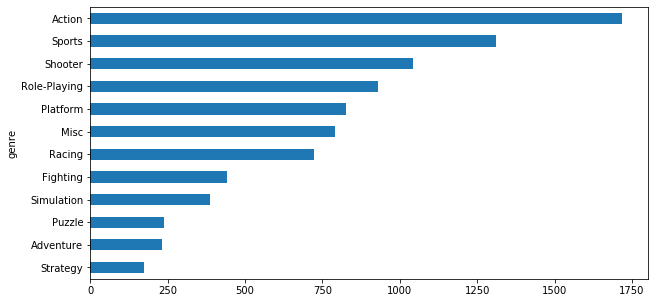

In [56]:
top_genre.sort_values().plot(kind='barh', figsize=(10,5))

Топ-5 самых продаваемых жанров это - Action, Sports, Shooter, Role-Playing, Platform.

<a id='step4'></a>

### Шаг 4 Составление портрета пользователя каждого региона

<a href='#step1'>Шаг 1</a> - <a href='#step2'>Шаг 2</a> - <a href='#step3'>Шаг 3</a> - <a href='#step4'>Шаг 4</a> - <a href='#step5'>Шаг 5</a> - <a href='#step6'>Шаг 6</a>

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### Топ-5 платформ по регионам

In [57]:
top_sales_by_platform = top_games.groupby(by='platform')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='na_sales', 
                                                                                            ascending=False).head(5)
top_sales_by_platform

,na_sales,eu_sales,jp_sales
platform,,,
X360,595.74,268.32,12.30
Wii,486.87,258.32,68.28
PS3,390.13,327.21,79.41
PS4,108.74,141.09,15.96
PC,93.34,140.37,0.17


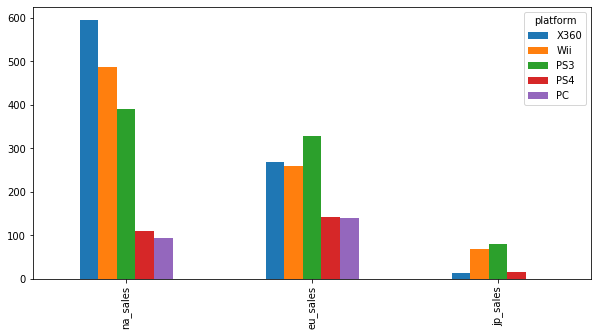

In [58]:
top_sales_by_platform.T.plot(kind='bar', figsize=(10, 5))

Лидеры продаж по регионам отличаются для NA это X360, для EU - PS3, для JP - DS.

#### Топ-5 жанров по регионам

In [59]:
top_sales_by_genre = top_games.groupby(by='genre')['na_sales', 'eu_sales', 'jp_sales'].sum().sort_values(by='na_sales', 
                                                                                            ascending=False).head(5)
top_sales_by_genre

,na_sales,eu_sales,jp_sales
genre,,,
Action,420.83,303.36,73.02
Shooter,364.62,235.11,17.59
Sports,337.56,225.38,31.15
Misc,222.31,113.40,26.26
Role-Playing,139.70,96.06,79.22


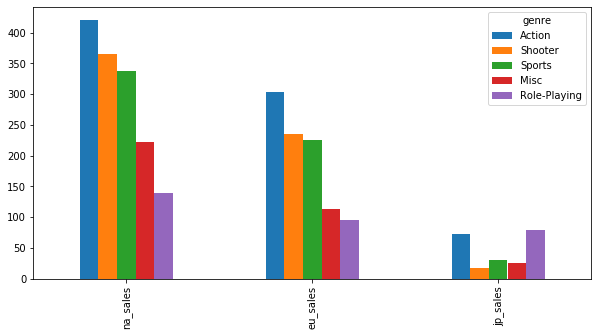

In [60]:
top_sales_by_genre.T.plot(kind='bar', figsize=(10, 5))

Предпочтения по жанрам в NA и EU почти не различаются, в JP на первом месте Role-Playing, а Shooter занимает последнее место.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе

In [61]:
sales_by_rating = top_games.pivot_table(index='rating', 
                                  values=['na_sales', 'eu_sales', 'jp_sales'], 
                                  aggfunc='sum').reset_index()
sales_by_rating

,rating,eu_sales,jp_sales,na_sales
0,E,355.30,78.89,549.94
1,E10+,134.18,13.58,230.99
2,EC,0.00,0.00,0.71
3,K-A,0.11,0.00,2.30
4,M,390.93,39.93,560.19
5,RP,0.03,0.00,0.00
6,T,222.16,53.41,358.80


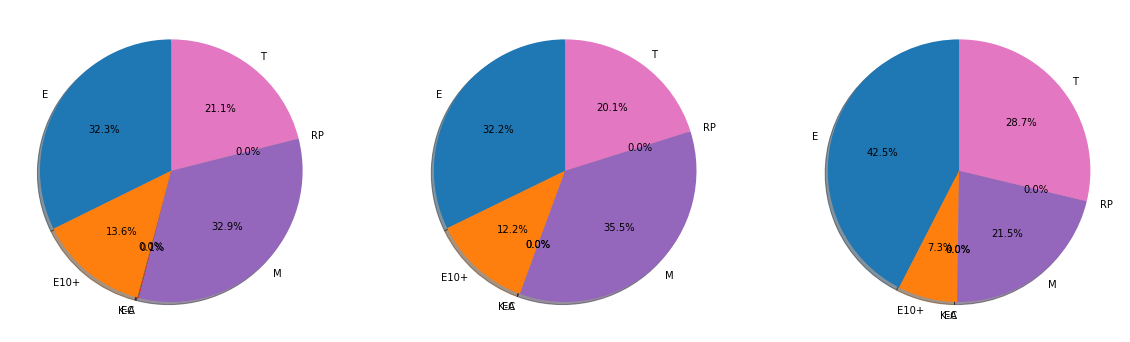

In [62]:
labels = sales_by_rating['rating']


fig1, ax1 = plt.subplots(1, 3, figsize=(20,15))

ax1[0].pie(sales_by_rating['na_sales'], labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1[1].pie(sales_by_rating['eu_sales'], labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1[2].pie(sales_by_rating['jp_sales'], labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.show()

Рейтинг E имеет самую высокую долю продаж для всех регионов. Распределение долей для регионов NA и JP очень похожи. 

Доля продаж игр с рейтингом М в JP почти в 2 рааза ниже.

<a id='step5'></a>

### Шаг 5 Проверка гипотез

<a href='#step1'>Шаг 1</a> - <a href='#step2'>Шаг 2</a> - <a href='#step3'>Шаг 3</a> - <a href='#step4'>Шаг 4</a> - <a href='#step5'>Шаг 5</a> - <a href='#step6'>Шаг 6</a>

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

----

### Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Проверим гипотезу о равенстве средних двух генеральных совокупностей на данных об играх за актуальный период.

**Нулевая гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Альтернативная гипотеза:** Средние пользовательские рейтинги Xbox One и PC НЕ одинаковые

sample_1 - пользовательский рейтинг игры Xbox One
sample_2 - пользовательский рейтинг игры PC

In [63]:
sample_1 = actual_games[(actual_games['platform'] == 'XOne') & (actual_games['user_score'] != -1)]['user_score']
sample_1.var()

1.8910067

In [64]:
sample_2 = actual_games[(actual_games['platform'] == 'PC') & (actual_games['user_score'] != -1)]['user_score']
sample_2.var()

2.9011543

In [65]:
from scipy import stats as st
import numpy as np

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1160154559677266
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Не получилось отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги Xbox One и PC одинаковые. 

Мы не можем утверждать, что выдвинутая гипотеза H0 доказана. При этом (p-value) вероятность получить наблюдаемый результат или еще более далекий от предполагаемого, при условии что H0 верна, составляет 12%.

### Гипотеза 2: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Проверим гипотезу о равенстве средних двух генеральных совокупностей.

**Нулевая гипотеза:** Средние пользовательские рейтинги жанров Action и Sports одинаковые.

**Альтернативная гипотеза:** Средние пользовательские рейтинг Action и Sports разные.

In [66]:
sample_1 = actual_games[(actual_games['genre'] == 'Action') & (actual_games['user_score'] != -1)]['user_score']
sample_1.var()

1.8984767

In [67]:
sample_2 = actual_games[(actual_games['genre'] == 'Sports') & (actual_games['user_score'] != -1)]['user_score']
sample_2.var()

3.446979

In [68]:
from scipy import stats as st
import numpy as np

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825639880196408e-14
Отвергаем нулевую гипотезу


**Вывод:** Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые не верна. 

Поэтому принимаем альтернативную гипотезу H1 о том, что средние пользовательские рейтинг Action и Sports разные.

<a id='step6'></a>

### Шаг 6 Общий вывод

<a href='#step1'>Шаг 1</a> - <a href='#step2'>Шаг 2</a> - <a href='#step3'>Шаг 3</a> - <a href='#step4'>Шаг 4</a> - <a href='#step5'>Шаг 5</a> - <a href='#step6'>Шаг 6</a>

В начале проекта перед нами стояла задача отработать принцип планирования кампании по продаже компютерных игр на будущий период на основании данных предыдущих лет и выявить закономерности, определяющие успешность игры.


##### Мы определили рейтинг топ-5 **платформ** по количеству продаж `top_platrorms`:

1. PS4
1. XOne
1. 3DS
1. PC
1. WiiU

При этом мы видим, что рейтинг платформ для разных регионов отличается `top_sales_by_platform`. Лидер продаж для NA это X360, для EU и для JP - PS3.

##### Рейтинг топ-5 **жанров** по количеству продаж `top_genre`:

1. Action
1. Sports
1. Shooter
1. Role-Playing
1. Platform.

Здесь также накладывается региональная специфика `top_sales_by_genre`. Предпочтения по жанрам в NA и EU почти не различаются, в JP предпочтения отдают Role-Playing и Action, а Shooter занимает последнее место.

В регионе NA и EU больше всего продается игр с **рейтингом ESRB** - E и М. В JP преобладают продажи игр с рейтингом E.

**Экспертный и пользовательский рейтинги** не слишком влияют на количество продаж. 

----
### **Чек-лист по заданиям**

Шаг 1 Изучение общей информации о данных
- [x]  Откройте файл
- [x]  Изучите общуую информацию

Шаг 2 Подготовка данных
- [x]  Замените названия столбцов (приведите к нижнему регистру);
- [x]  Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- [x]  Обработайте пропуски при необходимости:
- [x]  Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- [x]  Опишите причины, которые могли привести к пропускам;
- [x]  Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
- [x]  Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

Шаг 3 Проведение исследовательского анализа данных
- [x]  Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- [x]  Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- [x]  Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- [x]  Не учитывайте в работе данные за предыдущие годы.
- [x]  Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- [x]  Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- [x]  Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- [x]  Соотнесите выводы с продажами игр на других платформах.
- [x]  Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Шаг 4 Составление портрета пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
- [x]  Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- [x]  Самые популярные жанры (топ-5). Поясните разницу.
- [x]  Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Шаг 5 Проверка гипотез
- [x]  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- [x]  Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- [x]  Задайте самостоятельно пороговое значение alpha.
Поясните:
- [x]  Как вы сформулировали нулевую и альтернативную гипотезы;
- [x]  Какой критерий применили для проверки гипотез и почему.

Шаг 6 Общий вывод
- [x]  Вывод